In [89]:
using ReachabilityAnalysis, Plots

In [90]:
using BenchmarkTools

In [91]:
@taylorize function laubloomis!(dx, x, params, t)
    dx[1] = 1.4*x[3] - 0.9*x[1]
    dx[2] = 2.5*x[5] - 1.5*x[2]
    dx[3] = 0.6*x[7] - 0.8*(x[2]*x[3])
    dx[4] = 2 - 1.3*(x[3]*x[4])
    dx[5] = 0.7*x[1] - (x[4]*x[5])
    dx[6] = 0.3*x[1] - 3.1*x[6]
    dx[7] = 1.8*x[6] - 1.6*(x[2]*x[7])
    return dx
end

In [92]:
W = [0.01, 0.05, 0.1]; # box range of the initial set

# initial-value problem
X0c = [1.2, 1.05, 1.5, 2.4, 1.0, 0.1, 0.45];

In [56]:
X0 = Hyperrectangle(X0c, fill(W[1], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
@btime sol1 = solve($prob, tspan=(0.0, 20.0));

  8.835 s (116991560 allocations: 6.60 GiB)


In [57]:
X0 = Hyperrectangle(X0c, fill(W[2], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
@btime sol2 = solve($prob, tspan=(0.0, 20.0));

  7.974 s (105736714 allocations: 5.82 GiB)


In [58]:
X0 = Hyperrectangle(X0c, fill(W[3], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
@btime sol3 = solve($prob, tspan=(0.0, 20.0));

  6.824 s (84843058 allocations: 4.39 GiB)


In [65]:
X0 = Hyperrectangle(X0c, fill(W[3], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
sol3 = solve(prob, tspan=(0.0, 20.0));

In [66]:
X0 = Hyperrectangle(X0c, fill(W[2], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
sol2 = solve(prob, tspan=(0.0, 20.0));

In [67]:
X0 = Hyperrectangle(X0c, fill(W[1], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
sol1 = solve(prob, tspan=(0.0, 20.0));

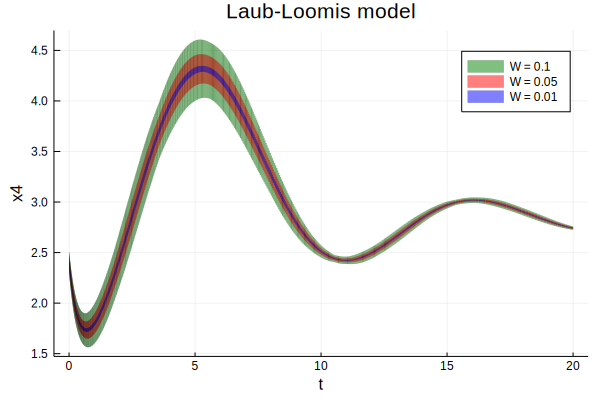

In [68]:
plot( overapproximate(sol3, Zonotope), vars=(0, 4), color=:green, lw=0.1, lab="W = $(W[3])", title="Laub-Loomis model", xlab="t", ylab="x4")
plot!(overapproximate(sol2, Zonotope), vars=(0, 4), color=:red,   lw=0.1, lab="W = $(W[2])")
plot!(overapproximate(sol1, Zonotope), vars=(0, 4), color=:blue,  lw=0.1, lab="W = $(W[1])")

In [44]:
sol1.alg

TMJets{Float64}
  max_steps: Int64 2000
  abs_tol: Float64 1.0e-15
  orderT: Int64 8
  orderQ: Int64 2


## abs_tol=1e-10

In [50]:
X0 = Hyperrectangle(X0c, fill(W[1], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
@btime sol = solve($prob, tspan=(0.0, 20.0), TMJets(abs_tol=1e-10));

  4.254 s (44728041 allocations: 2.45 GiB)


In [51]:
X0 = Hyperrectangle(X0c, fill(W[2], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
@btime sol = solve($prob, tspan=(0.0, 20.0), TMJets(abs_tol=1e-10));

  6.105 s (70144502 allocations: 3.52 GiB)


In [52]:
X0 = Hyperrectangle(X0c, fill(W[3], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
@btime sol = solve($prob, tspan=(0.0, 20.0), TMJets(abs_tol=1e-10));

  7.049 s (79804253 allocations: 3.98 GiB)


In [69]:
X0 = Hyperrectangle(X0c, fill(W[1], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
sol1 = solve(prob, tspan=(0.0, 20.0), TMJets(abs_tol=1e-10));

In [70]:
X0 = Hyperrectangle(X0c, fill(W[2], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
sol2 = solve(prob, tspan=(0.0, 20.0), TMJets(abs_tol=1e-10));

In [71]:
X0 = Hyperrectangle(X0c, fill(W[3], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
sol3 = solve(prob, tspan=(0.0, 20.0), TMJets(abs_tol=1e-10));

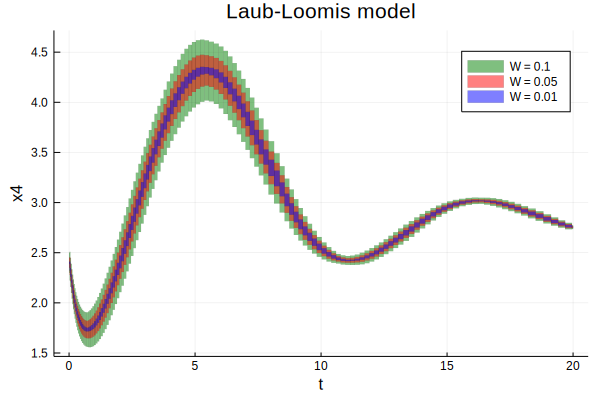

In [75]:
plot( overapproximate(sol3, Zonotope), vars=(0, 4), color=:green, lw=0.1, lab="W = $(W[3])", title="Laub-Loomis model", xlab="t", ylab="x4")
plot!(overapproximate(sol2, Zonotope), vars=(0, 4), color=:red,   lw=0.1, lab="W = $(W[2])")
plot!(overapproximate(sol1, Zonotope), vars=(0, 4), color=:blue,  lw=0.1, lab="W = $(W[1])")

In [94]:
@time begin
    X0 = Hyperrectangle(X0c, fill(W[1], 7))
    prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
    sol = solve(prob, tspan=(0.0, 5.0), TMJets(max_steps=1000, abs_tol=1e-7, orderT=5, orderQ=1));
    solZ = overapproximate(sol, Zonotope);
    v4 = [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0] # the flowpipe has been projected so we check for the second component which is x4
    @assert all([((-ρ(-v4, solZ.F.Xk[i].X)..ρ(v4, solZ.F.Xk[i].X)) < 4.5) for i in eachindex(solZ.F.Xk)])
end

  1.937838 seconds (26.12 M allocations: 1.320 GiB, 16.24% gc time)


In [96]:
@time begin
    X0 = Hyperrectangle(X0c, fill(W[2], 7))
    prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
    sol = solve(prob, tspan=(0.0, 5.0), TMJets(max_steps=1000, abs_tol=1e-7, orderT=5, orderQ=1));
    solZ = overapproximate(sol, Zonotope);
    v4 = [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0] # the flowpipe has been projected so we check for the second component which is x4
    @assert all([((-ρ(-v4, solZ.F.Xk[i].X)..ρ(v4, solZ.F.Xk[i].X)) < 4.5) for i in eachindex(solZ.F.Xk)])
end

  1.810310 seconds (24.20 M allocations: 1.178 GiB, 17.18% gc time)


In [97]:
@time begin
    X0 = Hyperrectangle(X0c, fill(W[3], 7))
    prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
    sol = solve(prob, tspan=(0.0, 5.0), TMJets(max_steps=1000, abs_tol=1e-7, orderT=5, orderQ=1));
    solZ = overapproximate(sol, Zonotope);
    v4 = [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0] # the flowpipe has been projected so we check for the second component which is x4
    @assert all([((-ρ(-v4, solZ.F.Xk[i].X)..ρ(v4, solZ.F.Xk[i].X)) < 4.5) for i in eachindex(solZ.F.Xk)])
end

AssertionError: AssertionError: all([-(ρ(-v4, (solZ.F.Xk[i]).X)) .. ρ(v4, (solZ.F.Xk[i]).X) < 4.5 for i = eachindex(solZ.F.Xk)])